# Adsorbates on a Square Lattice in the Grand Canonical Ensemble

In [1]:
using FreeBird
using Plots
using DataFrames
using CSV
using Distributions

In [2]:
df_microstates = CSV.read("data/microstates_exact_square_L4_M4_adsorption-0.04_nn-0.01_nnn-0.0025_cutoff1.1_1.5.csv", DataFrame)

# Add a row at the beginning for N=0
df_microstates = vcat(DataFrame(N=0, L=4, M=4, energy=0, configurations=""), df_microstates)

# Print the first few rows
first(df_microstates, 5)

Row,N,L,M,energy,configurations
,Int64,Int64,Int64,Float64,String
1,0,4,4,0.0,
2,1,4,4,-0.04,"LatticeSystem([1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0], [0.0 0.0 0.0; 1.0 0.0 0.0; 2.0 0.0 0.0; 3.0 0.0 0.0; 0.0 1.0 0.0; 1.0 1.0 0.0; 2.0 1.0 0.0; 3.0 1.0 0.0; 0.0 2.0 0.0; 1.0 2.0 0.0; 2.0 2.0 0.0; 3.0 2.0 0.0; 0.0 3.0 0.0; 1.0 3.0 0.0; 2.0 3.0 0.0; 3.0 3.0 0.0], (4, 4, 1), Bool[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [([2, 4, 5, 13], [6, 8, 14, 16]), ([1, 3, 6, 14], [5, 7, 13, 15]), ([2, 4, 7, 15], [6, 8, 14, 16]), ([1, 3, 8, 16], [5, 7, 13, 15]), ([1, 6, 8, 9], [2, 4, 10, 12]), ([2, 5, 7, 10], [1, 3, 9, 11]), ([3, 6, 8, 11], [2, 4, 10, 12]), ([4, 5, 7, 12], [1, 3, 9, 11]), ([5, 10, 12, 13], [6, 8, 14, 16]), ([6, 9, 11, 14], [5, 7, 13, 15]), ([7, 10, 12, 15], [6, 8, 14, 16]), ([8, 9, 11, 16], [5, 7, 13, 15]), ([1, 9, 14, 16], [2, 4, 10, 12]), ([2, 10, 13, 15], [1, 3, 9, 11]), ([3, 11, 14, 16], [2, 4, 10, 12]), ([4, 12, 13, 15], [1, 3, 9, 11])], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])"
3,1,4,4,-0.04,"LatticeSystem([1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0], [0.0 0.0 0.0; 1.0 0.0 0.0; 2.0 0.0 0.0; 3.0 0.0 0.0; 0.0 1.0 0.0; 1.0 1.0 0.0; 2.0 1.0 0.0; 3.0 1.0 0.0; 0.0 2.0 0.0; 1.0 2.0 0.0; 2.0 2.0 0.0; 3.0 2.0 0.0; 0.0 3.0 0.0; 1.0 3.0 0.0; 2.0 3.0 0.0; 3.0 3.0 0.0], (4, 4, 1), Bool[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [([2, 4, 5, 13], [6, 8, 14, 16]), ([1, 3, 6, 14], [5, 7, 13, 15]), ([2, 4, 7, 15], [6, 8, 14, 16]), ([1, 3, 8, 16], [5, 7, 13, 15]), ([1, 6, 8, 9], [2, 4, 10, 12]), ([2, 5, 7, 10], [1, 3, 9, 11]), ([3, 6, 8, 11], [2, 4, 10, 12]), ([4, 5, 7, 12], [1, 3, 9, 11]), ([5, 10, 12, 13], [6, 8, 14, 16]), ([6, 9, 11, 14], [5, 7, 13, 15]), ([7, 10, 12, 15], [6, 8, 14, 16]), ([8, 9, 11, 16], [5, 7, 13, 15]), ([1, 9, 14, 16], [2, 4, 10, 12]), ([2, 10, 13, 15], [1, 3, 9, 11]), ([3, 11, 14, 16], [2, 4, 10, 12]), ([4, 12, 13, 15], [1, 3, 9, 11])], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])"
4,1,4,4,-0.04,"LatticeSystem([1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0], [0.0 0.0 0.0; 1.0 0.0 0.0; 2.0 0.0 0.0; 3.0 0.0 0.0; 0.0 1.0 0.0; 1.0 1.0 0.0; 2.0 1.0 0.0; 3.0 1.0 0.0; 0.0 2.0 0.0; 1.0 2.0 0.0; 2.0 2.0 0.0; 3.0 2.0 0.0; 0.0 3.0 0.0; 1.0 3.0 0.0; 2.0 3.0 0.0; 3.0 3.0 0.0], (4, 4, 1), Bool[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [([2, 4, 5, 13], [6, 8, 14, 16]), ([1, 3, 6, 14], [5, 7, 13, 15]), ([2, 4, 7, 15], [6, 8, 14, 16]), ([1, 3, 8, 16], [5, 7, 13, 15]), ([1, 6, 8, 9], [2, 4, 10, 12]), ([2, 5, 7, 10], [1, 3, 9, 11]), ([3, 6, 8, 11], [2, 4, 10, 12]), ([4, 5, 7, 12], [1, 3, 9, 11]), ([5, 10, 12, 13], [6, 8, 14, 16]), ([6, 9, 11, 14], [5, 7, 13, 15]), ([7, 10, 12, 15], [6, 8, 14, 16]), ([8, 9, 11, 16], [5, 7, 13, 15]), ([1, 9, 14, 16], [2, 4, 10, 12]), ([2, 10, 13, 15], [1, 3, 9, 11]), ([3, 11, 14, 16], [2, 4, 10, 12]), ([4, 12, 13, 15], [1, 3, 9, 11])], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])"
5,1,4,4,-0.04,"LatticeSystem([1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0], [0.0 0.0 0.0; 1.0 0.0 0.0; 2.0 0.0 0.0; 3.0 0.0 0.0; 0.0 1.0 0.0; 1.0 1.0 0.0; 2.0 1.0 0.0; 3.0 1.0 0.0; 0.0 2.0 0.0; 1.0 2.0 0.0; 2.0 2.0 0.0; 3.0 2.0 0.0; 0.0 3.0 0.0; 1.0 3.0 0.0; 2.0 3.0 0.0; 3.0 3.0 0.0], (4, 4, 1), Bool[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [([2, 4, 5, 13], [6, 8, 14, 16]), ([1, 3, 6, 14], [5, 7, 13, 15]), ([2, 4, 7, 15], [6, 8, 14, 16]), ([1, 3, 8, 16], [5, 7, 13, 15]), ([1, 6, 8, 9], [2, 4, 10, 12]), ([2, 5, 7, 10], [1, 3, 9, 11]), ([3, 6, 8, 11], [2, 4, 10, 12]), ([4, 5, 7, 12], [1, 3, 9, 11]), ([5, 10, 12, 13], [6, 8, 14, 16]), ([6, 9, 11, 14], [5, 7, 13, 15]), ([7, 10, 12, 15], [6, 8, 14, 16]), ([8, 9, 11, 16], [5, 7, 13, 15]), ([1, 9, 14, 16], [2, 4, 10, 12]), ([2, 10, 13, 15], [1, 3, 9, 11]), ([3, 11, 14, 16], [2, 4, 10, 12]), ([4, 12, 13, 15], [1, 3, 9, 11])], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])"


## Thermodynamics

### Ensemble Average of the Number of Adsorbates

$ \mu = 2 \varepsilon_{\mathrm{NN}} $

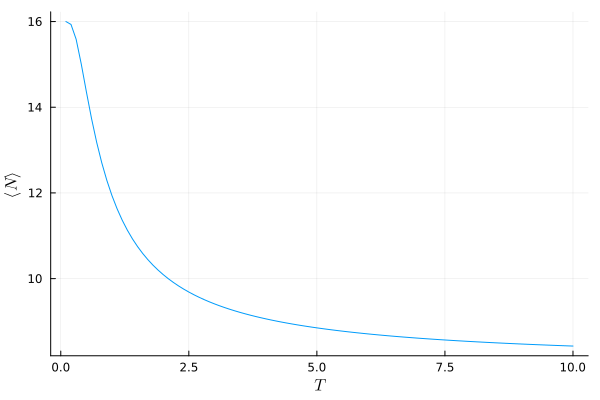

In [3]:
Ns = unique(df_microstates.N)
Ts = collect(0.1:0.1:10)
βs = 1 ./ Ts
μ = 1

# Loop over all (N, E) pairs
Z = zeros(length(βs))
numerator = zeros(length(βs))
for N in Ns
    df_microstates_N = deepcopy(df_microstates[df_microstates.N .== N, :])

    # Compute the grand potential
    E = deepcopy(df_microstates_N.energy)
    Ω = E .- μ * N

    # Compute the exponential of minus β multiplied by the grand potential
    Z_N = zeros(length(βs))
    numerator_N = zeros(length(βs))
    for (i, β) in enumerate(βs)
        Z_N[i] = sum(exp.(-β .* Ω))
        numerator_N[i] = sum(exp.(-β .* Ω) .* N)
    end

    # Add the contribution of this (N, E) pair to the grand partition function
    Z .+= Z_N
    numerator .+= numerator_N
end

# Plot the average number of particles
plot(Ts, numerator ./ Z, label="", xlabel="\$T\$", ylabel="\$\\langle N \\rangle\$")

### Ensemble Average of the Number of Adsorbates as a Function of the Chemical Potential

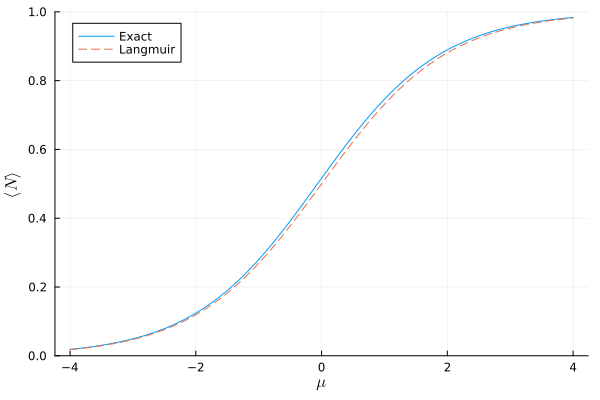

In [13]:
Ns = unique(df_microstates.N)
Ts = [1]  # collect(1:1:200)
βs = 1 ./ Ts
μs = collect(-4:0.1:4)

# Loop over all μ values
N_avgs = zeros(length(μs))
for (i, μ) in enumerate(μs)
    # Loop over all (N, E) pairs
    Ξ = zeros(length(βs))
    numerator = zeros(length(βs))
    for N in Ns
        df_microstates_N = deepcopy(df_microstates[df_microstates.N .== N, :])

        # Compute the grand potential
        E = deepcopy(df_microstates_N.energy)
        Ω = E .- μ * N

        # Compute the exponential of minus β multiplied by the grand potential
        Ξ_N = zeros(length(βs))
        numerator_N = zeros(length(βs))
        for (i, β) in enumerate(βs)
            Ξ_N[i] = sum(exp.(-β .* Ω))
            numerator_N[i] = sum(exp.(-β .* Ω) .* N)
        end

        # Add the contribution of this (N, E) pair to the grand partition function
        Ξ .+= Ξ_N
        numerator .+= numerator_N
    end

    # Compute the average number of particles
    N_avg = numerator ./ Ξ

    # Store the average number of particles
    N_avgs[i] = N_avg[1]
end

# Compute Langmuir coverage
θ_langmuir = exp.(μs) ./ (1 .+ exp.(μs))

# Plot the average number of particles
plot(μs, N_avgs ./ 16, label="Exact", xlabel="\$\\mu\$", ylabel="\$\\langle N \\rangle\$", ylimit=(0, 1))
plot!(μs, θ_langmuir, label="Langmuir", linestyle=:dash)